In [ ]:
%matplotlib inline


## Coesite, 17O (I=5/2)

17O (I=5/2) quadrupolar spectrum simulation.


Coesite is a high-pressure (2-3 GPa) and high-temperature (700°C) polymorph of silicon dioxide $\text{SiO}_2$. Coesite has five crystallographic $^{17}\text{O}$ sites. In the following, we use the $^{17}\text{O}$ EFG tensor information from Grandinetti *et. al.*[1].

In [1]:
import matplotlib.pyplot as plt

import mrsimulator.signal_processing as sp
import mrsimulator.signal_processing.apodization as apo

from mrsimulator import Simulator, SpinSystem, Site
from mrsimulator.methods import BlochDecayCentralTransitionSpectrum

## Step 1: Create the spin systems

#### Sites

In [2]:
# default unit of isotropic_chemical_shift is ppm and Cq is Hz.
O17_1 = Site(
    isotope="17O", isotropic_chemical_shift=29, quadrupolar={"Cq": 6.05e6, "eta": 0.000}
)
O17_2 = Site(
    isotope="17O", isotropic_chemical_shift=41, quadrupolar={"Cq": 5.43e6, "eta": 0.166}
)
O17_3 = Site(
    isotope="17O", isotropic_chemical_shift=57, quadrupolar={"Cq": 5.45e6, "eta": 0.168}
)
O17_4 = Site(
    isotope="17O", isotropic_chemical_shift=53, quadrupolar={"Cq": 5.52e6, "eta": 0.169}
)
O17_5 = Site(
    isotope="17O", isotropic_chemical_shift=58, quadrupolar={"Cq": 5.16e6, "eta": 0.292}
)

# all five sites.
sites = [O17_1, O17_2, O17_3, O17_4, O17_5]

#### Spin systems

In [3]:
abundance = [1, 1, 2, 2, 2]

spin_systems = []
for i in range(5):
    system = SpinSystem(sites=[sites[i]], abundance=abundance[i])
    spin_systems.append(system)

## Step 2: Create the methods

Setup a central transition selective Bloch decay spectrum method.

In [4]:
method = BlochDecayCentralTransitionSpectrum(
    channels=["17O"],
    magnetic_flux_density=9.4, # T
    rotor_angle = 54.735 * 3.1415 /180, # in rads
    rotor_frequency=14000,  # in Hz
    spectral_dimensions=[
        {
            "count": 2048,
            "spectral_width": 50000,  # in Hz
            "label": r"$^{17}$O resonances",
        }
    ],
)

## Step 3: Setup and run the simulation

In [5]:
sim = Simulator()
sim.spin_systems = spin_systems  # add the spin systems
sim.methods = [method]  # add the method

sim.run()

The plot of the spectrum

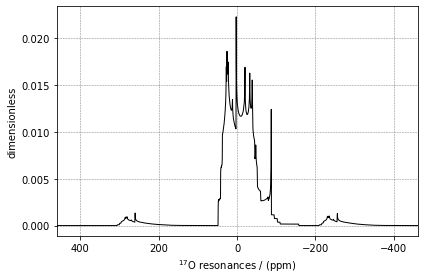

In [6]:
data = sim.methods[0].simulation.real
# The plot of the simulation before signal processing.
ax = plt.subplot(projection="csdm")
ax.plot(data, color="black", linewidth=1)
ax.invert_xaxis()
plt.tight_layout()
plt.show()

Add post-simulation signal processing.

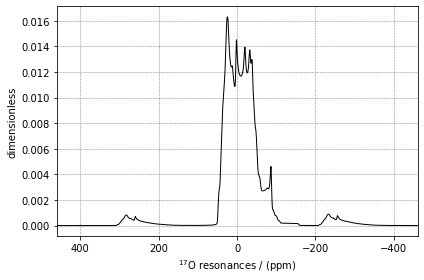

In [7]:
processor = sp.SignalProcessor(
    operations=[
        sp.IFFT(),
        apo.Exponential(FWHM="30 Hz"),
        apo.Gaussian(FWHM="145 Hz"),
        sp.FFT(),
    ]
)
processed_data = processor.apply_operations(data=data)

# The plot of the simulation after signal processing.
ax = plt.subplot(projection="csdm")
ax.plot(processed_data.real, color="black", linewidth=1)
ax.invert_xaxis()
plt.tight_layout()
plt.show()

1. Grandinetti, P. J., Baltisberger, J. H., Farnan, I., Stebbins, J. F., Werner, U. and Pines, A. Solid-State $^{17}\text{O}$ Magic-Angle and Dynamic-Angle Spinning NMR Study of the $\text{SiO}_2$ Polymorph Coesite, J. Phys. Chem. 1995, **99**, *32*, 12341-12348. [DOI: 10.1021/j100032a045](https://doi.org/10.1021/j100032a045)